Test variables:

* n_estimators
* max_depth
* max_features

In [14]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone 
import matplotlib.pylab as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
%matplotlib inline  
plt.rcParams.update({'font.size':16})

In [2]:
dataDir = 'data/'
trainDir = 'train/'
train = pd.read_csv(dataDir+'creditcard.csv').values
X_train, X_test, y_train, y_test = train_test_split(train[:,:29],train[:,30],test_size=0.2)

This function plots the results given by `fitTest()`.

In [19]:
def plot_results(results,testname,variable,variable_range,metrics=['F1','precision','recall']):
    plt.figure(1,figsize=(20,10))
    
    for m in range(len(metrics)):
        plt.plot(variable_range,results[:,m], label = metrics[m])

    plt.xlabel(variable)
    plt.ylabel('Metric')
    plt.title('Metrics vs ' + testname)
    plt.legend(loc='best')
    plt.show()

This function does a full test varying the variable given by `variable` along the range given by `variable_range`, holding the other two test variables fixed at the given values. It outputs the scores for the models according to each evaluator in `metrics` for each value that `variable` can take on in the range `variable_range`.

In [26]:
def fitTest(variable,variable_range,n_estimators=5,max_depth=10,max_features=10,metrics=[f1_score,precision_score,recall_score],metricNames=['F1','precision','recall']):
    results = np.array([np.array([0. for _ in range(len(metrics))]) for _ in range(len(variable_range))])
    if variable == 'n_estimators':
        for i in range(len(variable_range)):
            print(variable + " = " + str(variable_range[i]),end='\t')
            clf = RandomForestClassifier(n_estimators=variable_range[i],max_depth=max_depth,max_features=max_features,n_jobs=3)
            clf.fit(X_train,y_train)
            ypr = clf.predict(X_test)
            for j in range(len(metrics)):
                results[i][j] = metrics[j](ypr,y_test)
                print(metricNames[j] + ": {:.3f}".format(results[i][j]),end='\t')
            print()
    elif variable == 'max_depth':
        for i in range(len(variable_range)):
            print(variable + " = " + str(variable_range[i]),end='\t')
            clf = RandomForestClassifier(n_estimators=n_estimators,max_depth=variable_range[i],max_features=max_features,n_jobs=3)
            clf.fit(X_train,y_train)
            ypr = clf.predict(X_test)
            for j in range(len(metrics)):
                results[i][j] = metrics[j](ypr,y_test)
                print(metricNames[j] + ": {:.3f}".format(results[i][j]),end='\t')
            print()
    elif variable == 'max_features':
        for i in range(len(variable_range)):
            print(variable + " = " + str(variable_range[i]),end="\t")
            clf = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,max_features=variable_range[i],n_jobs=3)
            clf.fit(X_train,y_train)
            ypr = clf.predict(X_test)
            for j in range(len(metrics)):
                results[i][j] = metrics[j](ypr,y_test)
                print(metricNames[j] + ": {:.3f}".format(results[i][j]),end='\t')
            print()
    return results

In [16]:
n_estimators_varying = fitTest('n_estimators',list(range(1,101)))

n_estimators = 1	F1: 0.770	precision: 0.692	recall: 0.867	
n_estimators = 2	F1: 0.761	precision: 0.673	recall: 0.875	
n_estimators = 3	F1: 0.798	precision: 0.721	recall: 0.893	
n_estimators = 4	F1: 0.825	precision: 0.750	recall: 0.918	
n_estimators = 5	F1: 0.851	precision: 0.798	recall: 0.912	
n_estimators = 6	F1: 0.850	precision: 0.788	recall: 0.921	
n_estimators = 7	F1: 0.840	precision: 0.760	recall: 0.940	
n_estimators = 8	F1: 0.830	precision: 0.750	recall: 0.929	
n_estimators = 9	F1: 0.836	precision: 0.760	recall: 0.929	
n_estimators = 10	F1: 0.836	precision: 0.760	recall: 0.929	
n_estimators = 11	F1: 0.836	precision: 0.760	recall: 0.929	
n_estimators = 12	F1: 0.847	precision: 0.769	recall: 0.941	
n_estimators = 13	F1: 0.832	precision: 0.740	recall: 0.951	
n_estimators = 14	F1: 0.847	precision: 0.769	recall: 0.941	
n_estimators = 15	F1: 0.836	precision: 0.760	recall: 0.929	
n_estimators = 16	F1: 0.845	precision: 0.760	recall: 0.952	
n_estimators = 17	F1: 0.847	precision: 0.769	reca

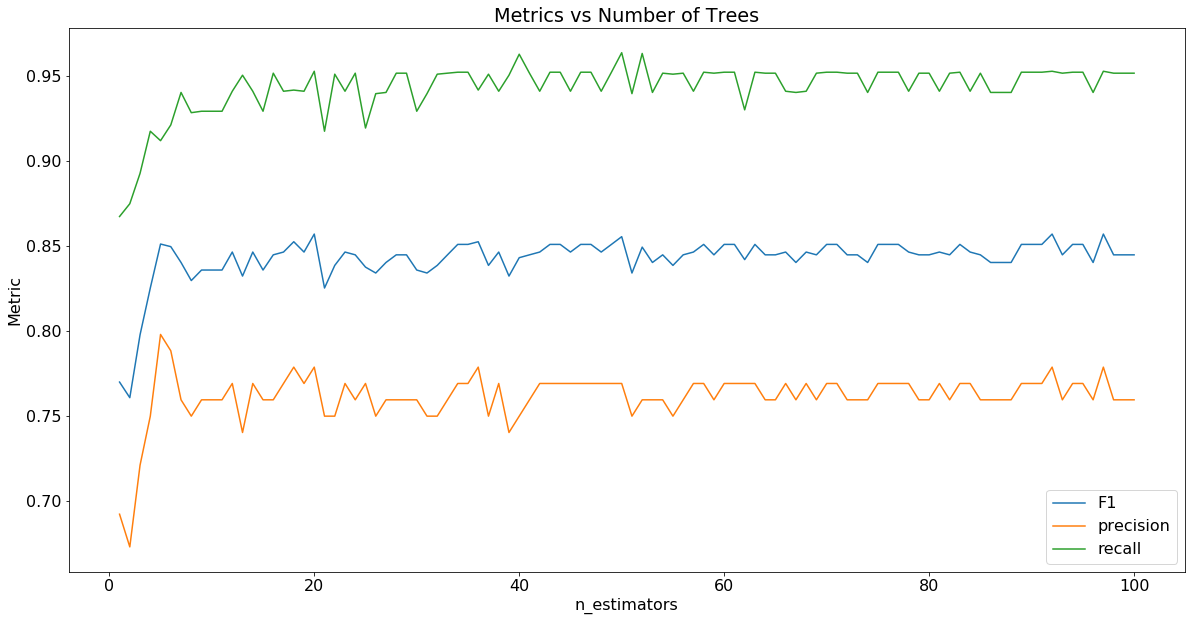

In [20]:
plot_results(n_estimators_varying,'Number of Trees','n_estimators',list(range(1,101)))

In [23]:
max_depth_varying = fitTest('max_depth',list(range(1,30)))

max_depth = 1	F1: 0.626	precision: 0.490	recall: 0.864	
max_depth = 2	F1: 0.627	precision: 0.500	recall: 0.839	
max_depth = 3	F1: 0.722	precision: 0.625	recall: 0.855	
max_depth = 4	F1: 0.778	precision: 0.692	recall: 0.889	
max_depth = 5	F1: 0.791	precision: 0.673	recall: 0.959	
max_depth = 6	F1: 0.809	precision: 0.731	recall: 0.905	
max_depth = 7	F1: 0.817	precision: 0.750	recall: 0.897	
max_depth = 8	F1: 0.859	precision: 0.788	recall: 0.943	
max_depth = 9	F1: 0.817	precision: 0.731	recall: 0.927	
max_depth = 10	F1: 0.865	precision: 0.798	recall: 0.943	
max_depth = 11	F1: 0.833	precision: 0.769	recall: 0.909	
max_depth = 12	F1: 0.838	precision: 0.769	recall: 0.920	
max_depth = 13	F1: 0.824	precision: 0.740	recall: 0.928	
max_depth = 14	F1: 0.827	precision: 0.760	recall: 0.908	
max_depth = 15	F1: 0.825	precision: 0.750	recall: 0.918	
max_depth = 16	F1: 0.859	precision: 0.788	recall: 0.943	
max_depth = 17	F1: 0.827	precision: 0.760	recall: 0.908	
max_depth = 18	F1: 0.832	precision: 0.74

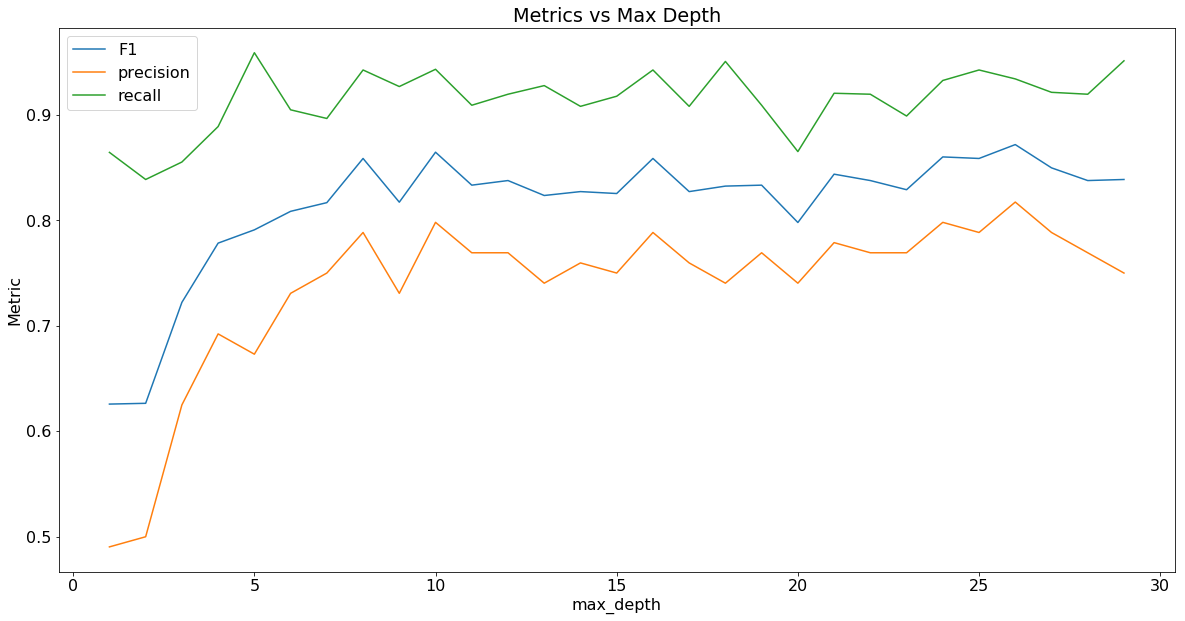

In [24]:
plot_results(max_depth_varying,'Max Depth','max_depth', list(range(1,30)))

In [25]:
max_features_varying = fitTest('max_features',list(range(1,30)))

max_features = 1	F1: 0.775	precision: 0.644	recall: 0.971	
max_features = 2	F1: 0.778	precision: 0.673	recall: 0.921	
max_features = 3	F1: 0.789	precision: 0.702	recall: 0.901	
max_features = 4	F1: 0.834	precision: 0.750	recall: 0.940	
max_features = 5	F1: 0.832	precision: 0.740	recall: 0.951	
max_features = 6	F1: 0.826	precision: 0.731	recall: 0.950	
max_features = 7	F1: 0.819	precision: 0.740	recall: 0.917	
max_features = 8	F1: 0.832	precision: 0.760	recall: 0.919	
max_features = 9	F1: 0.832	precision: 0.760	recall: 0.919	
max_features = 10	F1: 0.865	precision: 0.798	recall: 0.943	
max_features = 11	F1: 0.817	precision: 0.731	recall: 0.927	
max_features = 12	F1: 0.838	precision: 0.769	recall: 0.920	
max_features = 13	F1: 0.838	precision: 0.769	recall: 0.920	
max_features = 14	F1: 0.836	precision: 0.760	recall: 0.929	
max_features = 15	F1: 0.865	precision: 0.798	recall: 0.943	
max_features = 16	F1: 0.851	precision: 0.798	recall: 0.912	
max_features = 17	F1: 0.859	precision: 0.788	reca

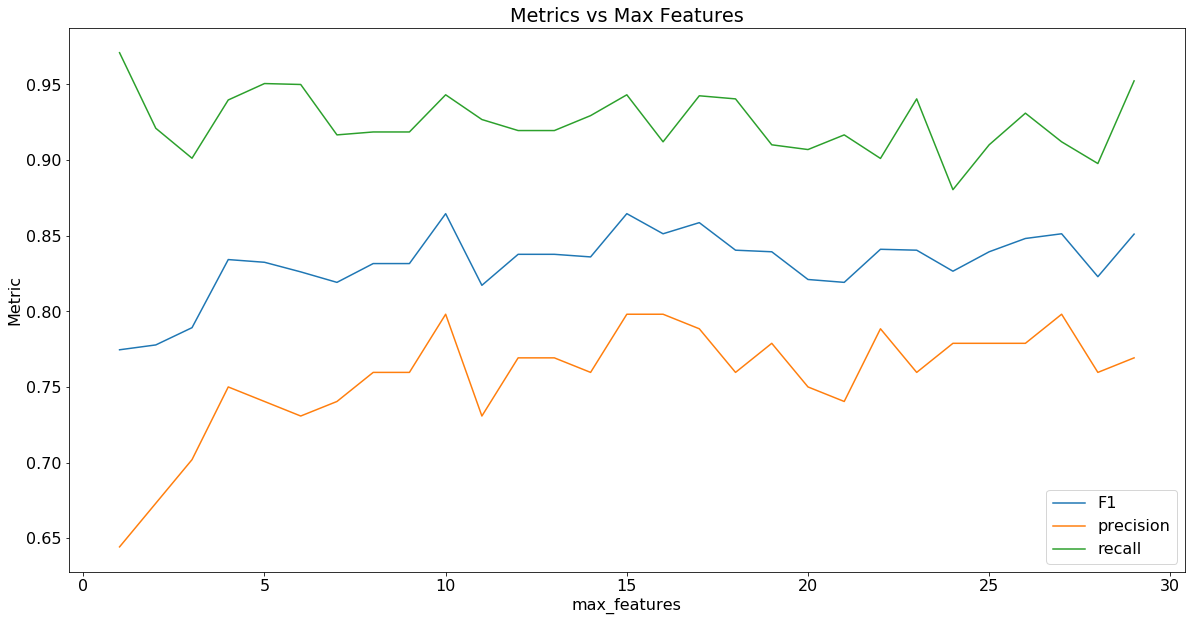

In [27]:
plot_results(max_features_varying,'Max Features','max_features', list(range(1,30)))